Clustering Customer Segments for E-commerce Personalization:E-commerce Customer Behavior

Step 1 : Data Exploration and Preprocessing

1.Handling missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None
Missing values per column:
Customer ID                 0
Gender                      0
Age             

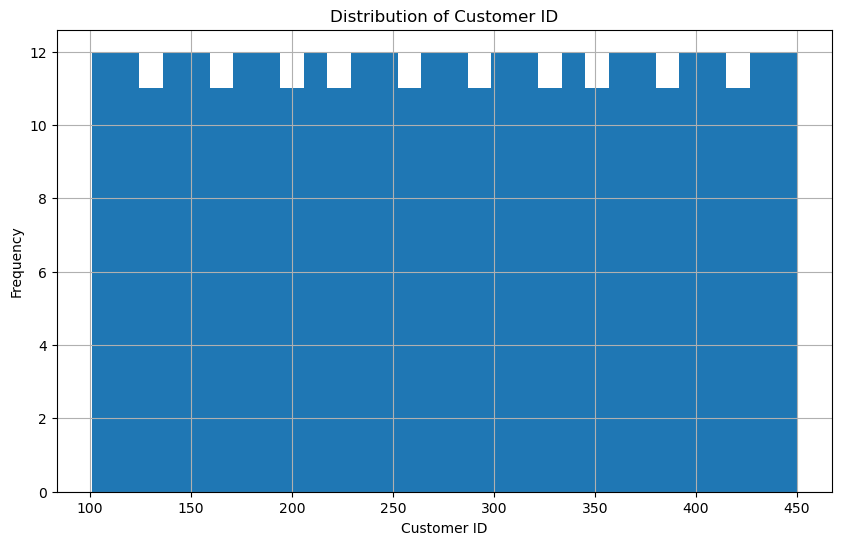

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')

# Display basic info
print(df.info())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For non-numeric columns, fill missing values with the most frequent value (mode)
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Recheck for missing values
print("Missing values after filling:")
print(df.isnull().sum())

# Visualize the distribution of a numeric column as an example
plt.figure(figsize=(10, 6))
df[numeric_cols[0]].hist(bins=30)
plt.title(f"Distribution of {numeric_cols[0]}")
plt.xlabel(numeric_cols[0])
plt.ylabel("Frequency")
plt.show()

2. Encode Categorical Variables

Since clustering algorithms like K-Means work with numeric data, you need to encode categorical columns into numeric formats.

In [7]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode non-numeric (categorical) columns
encoded_data = pd.get_dummies(df[non_numeric_cols], drop_first=True)

# Combine encoded categorical data with numeric data
df_processed = pd.concat([df[numeric_cols], encoded_data], axis=1)
print("Processed data shape:", df_processed.shape)

Processed data shape: (350, 17)


3. Scale Numeric Features

To ensure all features contribute equally to the clustering process, scale the data.

In [10]:
from sklearn.preprocessing import StandardScaler

# Scale the processed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed)

print("Data after scaling:")
print(scaled_data[:5]) #retrieves and displays the first 5 rows of the scaled data

Data after scaling:
[[-1.72710914 -0.94515206  0.76013014  0.3373459   1.00198115 -0.11835933
   1.         -1.         -0.44567941 -0.45027674 -0.44567941  2.22085645
  -0.44567941  1.4111885  -0.70862255  1.32510585 -0.70407847]
 [-1.71721167  0.08282563 -0.17945875 -0.38553817  0.13947893 -0.63990676
  -1.          1.         -0.44567941  2.22085645 -0.44567941 -0.45027674
  -0.44567941 -0.70862255  1.4111885  -0.75465669 -0.70407847]
 [-1.70731419  1.93318547 -0.92557033 -0.86746089 -1.06802418  1.14825585
   1.         -1.         -0.44567941 -0.45027674 -0.44567941 -0.45027674
  -0.44567941 -0.70862255 -0.70862255 -0.75465669  1.42029623]
 [-1.69741672 -0.73955652  1.75614415  1.54215268  1.17448159 -1.08694741
  -1.          1.         -0.44567941 -0.45027674 -0.44567941 -0.45027674
   2.24376531  1.4111885  -0.70862255  1.32510585 -0.70407847]
 [-1.68751925 -1.35634313 -0.34569158  0.09638454 -0.03302151  2.11684392
   1.          1.         -0.44567941 -0.45027674  2.24376531 

Step 2 : Clustering techniques

1. Principal Component Analysis (PCA)

To reduce the dimensionality of the dataset for better clustering performance and visualization.

Explained variance ratio: [0.39900881 0.19854993]


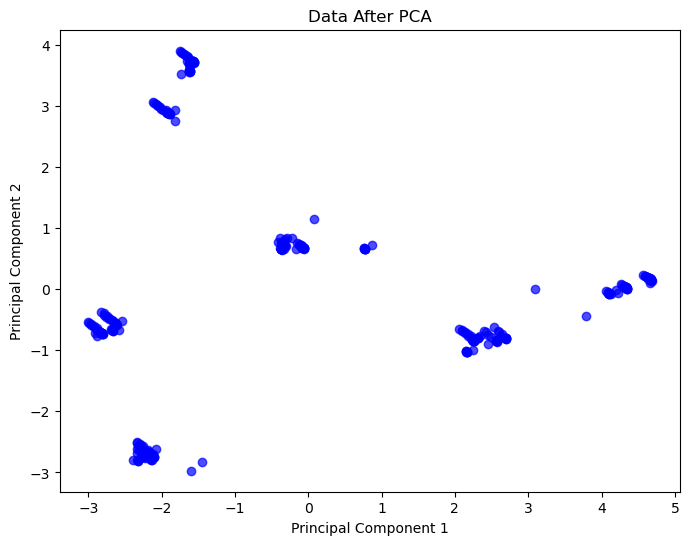

In [14]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
reduced_data = pca.fit_transform(scaled_data)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, color='blue')
plt.title("Data After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

2. K-Means Clustering

Perform K-Means clustering on the PCA-reduced data and determine the optimal number of clusters using the elbow method.

E:\Condadistribution\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Condadistribution\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Condadistribution\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Condadistribution\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

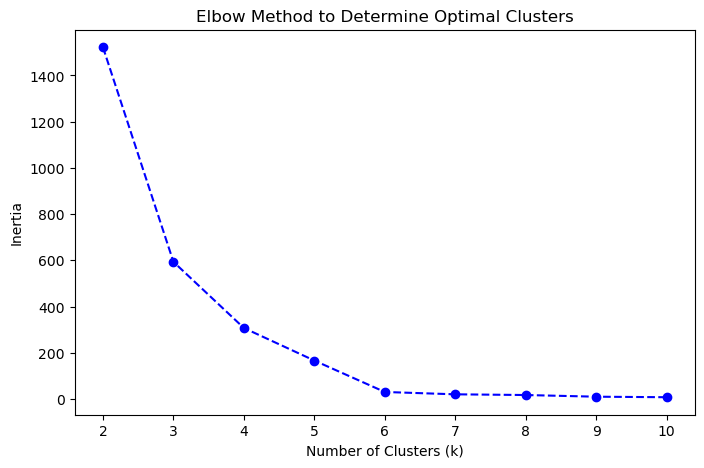

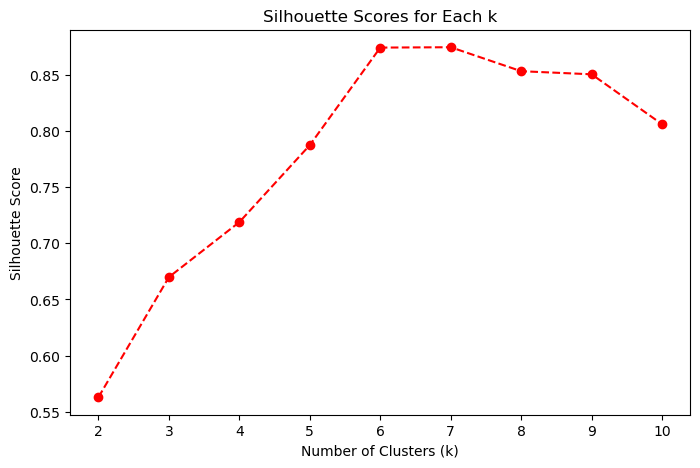

Clusters assigned to data:
Cluster
1    117
0    116
2     59
3     58
Name: count, dtype: int64


E:\Condadistribution\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Test 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Scores for Each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Fit K-Means with optimal number of clusters
optimal_k = 4  # Example; select based on elbow/silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
print("Clusters assigned to data:")
print(df['Cluster'].value_counts())

Step 3 : Visualize Clusters

Visualize the clusters formed by K-Means in the PCA-reduced space.

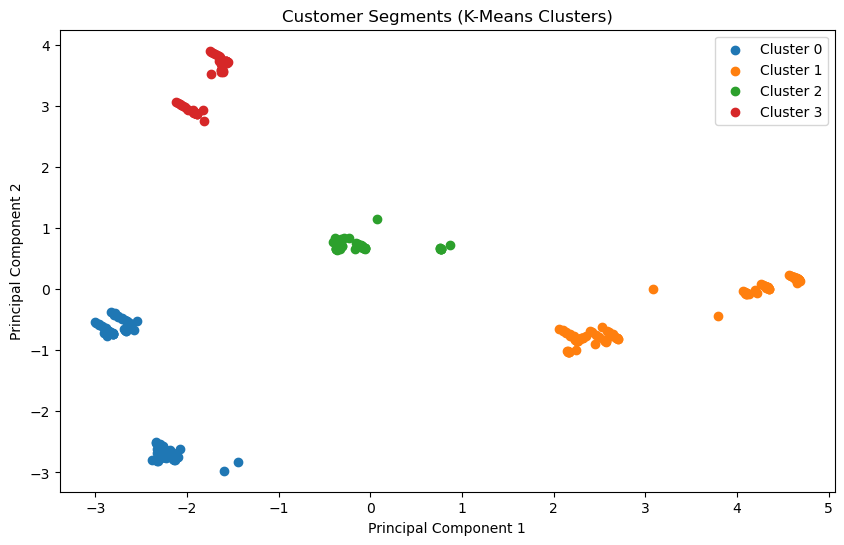

In [20]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = reduced_data[kmeans.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title("Customer Segments (K-Means Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Step 4 : Analyze Cluster Characteristics

Profile each cluster to understand customer behavior patterns.

Cluster Profiles (Numeric Columns Only):
         Customer ID        Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                                         
0         276.362069  39.362069   473.388793         8.491379        3.325000   
1         274.572650  29.923077  1311.144444        17.615385        4.675214   
2         275.576271  34.118644   805.491525        11.677966        4.172881   
3         275.568966  28.948276   690.389655        11.637931        3.927586   

         Days Since Last Purchase  Cluster  
Cluster                                     
0                       31.612069      0.0  
1                       17.940171      1.0  
2                       15.271186      2.0  
3                       45.500000      3.0  


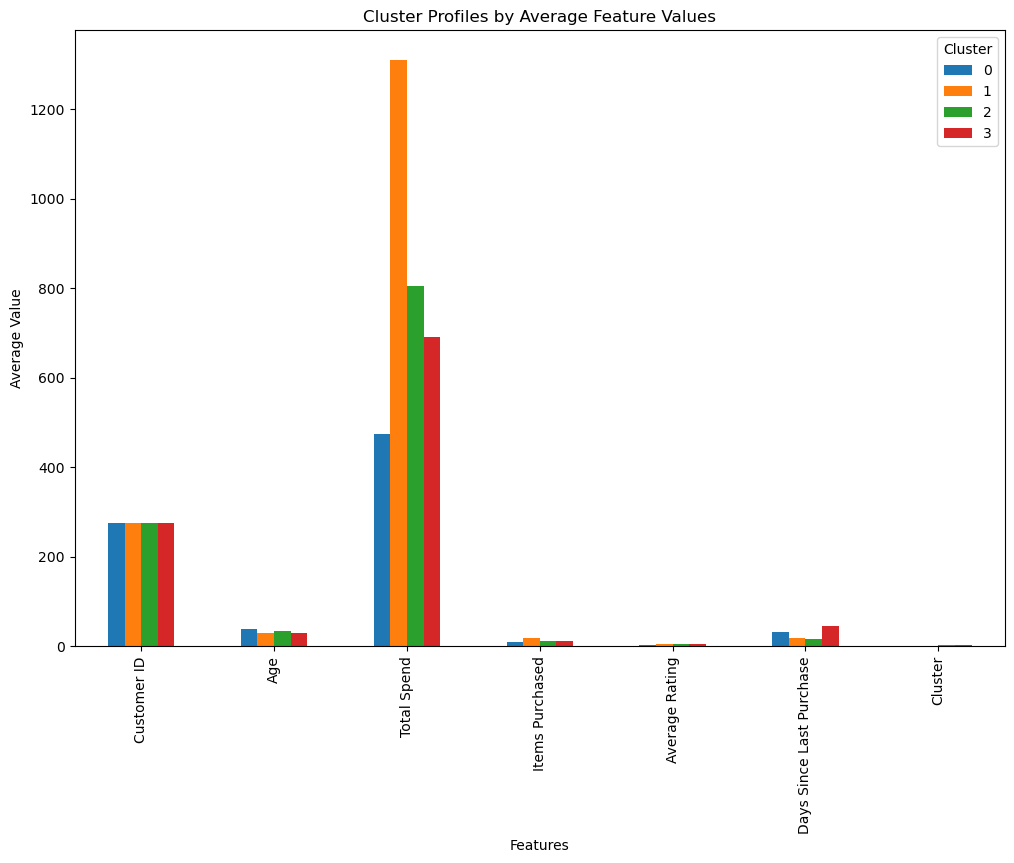

In [26]:
# Restrict mean calculation to numeric columns
numeric_cols = df.select_dtypes(include='number').columns  # Select only numeric columns

# Analyze cluster characteristics for numeric columns
cluster_profiles = df.groupby('Cluster')[numeric_cols].mean()

print("Cluster Profiles (Numeric Columns Only):")
print(cluster_profiles)

# Visualize cluster profiles
cluster_profiles.T.plot(kind='bar', figsize=(12, 8))  # Transpose for better readability
plt.title("Cluster Profiles by Average Feature Values")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.show()

In [28]:
# Analyze categorical (non-numeric) features
for col in df.select_dtypes(exclude='number').columns:
    mode_per_cluster = df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])  # Find the most common value (mode)
    print(f"Most common value in {col} by cluster:")
    print(mode_per_cluster)

Most common value in Gender by cluster:
Cluster
0    Female
1      Male
2      Male
3      Male
Name: Gender, dtype: object
Most common value in City by cluster:
Cluster
0        Chicago
1       New York
2    Los Angeles
3          Miami
Name: City, dtype: object
Most common value in Membership Type by cluster:
Cluster
0    Bronze
1      Gold
2    Silver
3    Silver
Name: Membership Type, dtype: object
Most common value in Discount Applied by cluster:
Cluster
0    False
1     True
2    False
3     True
Name: Discount Applied, dtype: bool
Most common value in Satisfaction Level by cluster:
Cluster
0    Unsatisfied
1      Satisfied
2        Neutral
3    Unsatisfied
Name: Satisfaction Level, dtype: object


In [ ]:
# Save the clustered data
df.to_csv('clustered_customers.csv', index=False)
print("Clustered data saved to 'clustered_customers.csv'")